In [1]:
from IPython.display import display, HTML
display(HTML('<h1><img src="logo.png" style="background-color: black"></h1>'))

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Annual Prediction 

In [3]:
train2 = pd.read_csv("Bihis 2020.csv")

In [4]:
train1 = pd.read_csv("Bihis 2021.csv")

In [5]:
test = pd.read_csv("Bihis 2022.csv")

In [6]:
train2_len = len(train2)
train1_len = len(train1)
test_len = len(test)

In [7]:
df = pd.concat([train2, train1, test], axis=0)
pd.set_option('display.max_rows', df.shape[0]+1)
df.reset_index(drop=True, inplace=True)
df

,Name,Size,Cost,Category,Sales,Year
0,Kamias,Medium,100,Tree,3400.0,2020
1,Kalamasi,Medium,120,Tree,4080.0,2020
2,Papaya,Small,50,Tree,1700.0,2020
3,Tundan,Small,80,Tree,3200.0,2020
4,Lakatan,Small,150,Tree,10500.0,2020
5,Rambutan,Medium,250,Tree,5000.0,2020
6,Suha,Small,130,Tree,1950.0,2020
7,Atis,Medium,130,Tree,3770.0,2020
8,Guyabano,Medium,100,Tree,2200.0,2020
9,Lemon,Large,100,Tree,1700.0,2020


In [8]:
%%capture
print(len(train2), len(train1), len(test), len(df))

In [9]:
%%capture
df.apply(lambda x: len(x.unique()))

In [10]:
%%capture
df.isnull().sum()

In [11]:
%%capture
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

In [12]:
%%capture
cat_col.remove('Name')
cat_col

In [13]:
%%capture
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print();

In [14]:
%%capture
size_mode = df.pivot_table(values = 'Size', columns = 'Category', aggfunc=(lambda x: x.mode()[0]))
size_mode

In [15]:
miss_bool = df['Size'].isnull()
df.loc[miss_bool, 'Size'] = df.loc[miss_bool, 'Category'].apply(lambda x: size_mode[x])

In [16]:
%%capture
df['Size'].isnull().sum()

In [17]:
df['Total_Year'] = 2022 - df['Year']

In [18]:
%%capture
df['Total_Year']

In [19]:
%%capture
df = pd.get_dummies(df, columns=[ 'Size', 'Category'])
df.head();

In [20]:
%%capture
df.tail();

In [21]:
%%capture
train2 = df.iloc[:train2_len,:]
train1 = df.iloc[train2_len:,:]
test = df.iloc[train2_len:,:]

In [22]:
%%capture
test = test.drop(columns=['Sales'])
test.head()

In [23]:
%%capture
test.tail();

In [24]:
X = train2.drop(columns=['Year', 'Name', 'Sales'])
y = train2['Sales']

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train2(model, X, y):
    model.fit(X, y)
    
    pred = model.predict(X)
    
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("Accuracy:", mean_squared_error(y,pred))
    print("CrossValidationScore:", cv_score)

# Accuracy of model

Model Report
Accuracy: 948780.1772681716
CrossValidationScore: 5282632.109389433


<Axes: title={'center': 'Feature Importances'}>

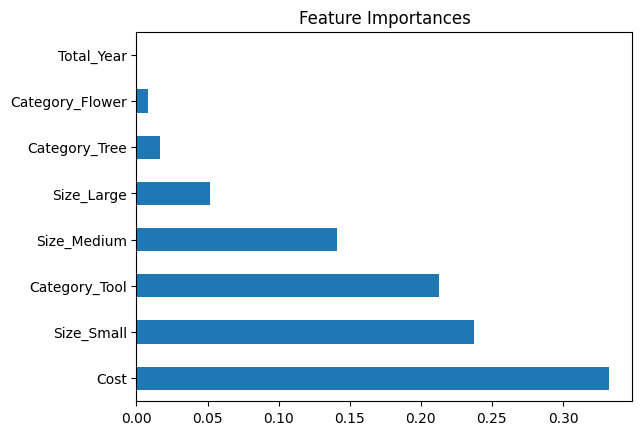

In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train2(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

In [27]:
%%capture
x_test = test.drop(columns=['Year', 'Name'])
x_test.head();

# Prediction

In [28]:
pred = model.predict(x_test)
pred

array([2712.16190476, 3863.44833333, 1987.4       , 2760.90833333,
       7264.22845238, 3389.66666667, 2325.37678571, 3632.93333333,
       2712.16190476, 1474.84761905, 2325.37678571, 2712.16190476,
       2589.28666667, 2325.37678571, 3143.2       , 1474.84761905,
       2325.37678571, 3389.66666667, 3534.4       , 6226.73333333,
       4584.2       , 4631.7       , 2288.06666667, 1979.2       ,
       2919.9       , 2340.75      , 1790.2       , 2850.06666667,
       7304.02845238, 3143.2       , 2712.16190476, 3863.44833333,
       1987.4       , 2760.90833333, 7264.22845238, 3389.66666667,
       2325.37678571, 3632.93333333, 2712.16190476, 1474.84761905,
       2325.37678571, 2712.16190476, 2589.28666667, 2325.37678571,
       3143.2       , 1474.84761905, 2325.37678571, 3389.66666667,
       3534.4       , 6226.73333333, 4584.2       , 4631.7       ,
       2288.06666667, 1979.2       , 2919.9       , 2340.75      ,
       1790.2       , 2850.06666667, 7304.02845238, 3143.2    

# Annual Prediction result

In [29]:
mission = pd.DataFrame()
mission['Name'] = test["Name"]
mission['sales'] = pred
mission['Year'] = 2022
pd.set_option('display.max_rows', df.shape[0]+1)
mission


,Name,sales,Year
28,Kamias,2712.161905,2022
29,Kalamasi,3863.448333,2022
30,Papaya,1987.400000,2022
31,Tundan,2760.908333,2022
32,Lakatan,7264.228452,2022
33,Rambutan,3389.666667,2022
34,Suha,2325.376786,2022
35,Atis,3632.933333,2022
36,Guyabano,2712.161905,2022
37,Lemon,1474.847619,2022


# Quarterly Prediction

In [30]:
mission = pd.DataFrame()
mission['Name'] = test["Name"]
mission['sales'] = pred / 12
mission['Quarterly'] = 3
pd.set_option('display.max_rows', df.shape[0]+1)
mission

,Name,sales,Quarterly
28,Kamias,226.013492,3
29,Kalamasi,321.954028,3
30,Papaya,165.616667,3
31,Tundan,230.075694,3
32,Lakatan,605.352371,3
33,Rambutan,282.472222,3
34,Suha,193.781399,3
35,Atis,302.744444,3
36,Guyabano,226.013492,3
37,Lemon,122.903968,3


# Monthly Prediction

In [31]:
mission = pd.DataFrame()
mission['Name'] = test["Name"]
mission['sales'] = pred / 36
mission['monthly'] = 1
pd.set_option('display.max_rows', df.shape[0]+1)
mission

,Name,sales,monthly
28,Kamias,75.337831,1
29,Kalamasi,107.318009,1
30,Papaya,55.205556,1
31,Tundan,76.691898,1
32,Lakatan,201.784124,1
33,Rambutan,94.157407,1
34,Suha,64.593800,1
35,Atis,100.914815,1
36,Guyabano,75.337831,1
37,Lemon,40.967989,1
